Importing libraries

In [1]:
import os
import warnings

import pandas as pd
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

Checking the current working directory and list of files

In [2]:
os.getcwd() , os.listdir(os.getcwd()), os.listdir(f"{os.getcwd()}/data")

('d:\\projects\\misc\\vacations_data_analysis',
 ['.git',
  '.gitignore',
  'data',
  'expenses_analysis.ipynb',
  'LICENSE',
  'README.md'],
 ['vacances.xlsx'])

reading the data file

In [3]:
data_file = "data/vacances.xlsx"

df = pd.read_excel(data_file,
                   header=0,
                   decimal=",")

df.head()

,date,description,amount,category,payee
0,2024-08-02,misc. Decathlon,87.3,misc,NaN
1,2024-08-03,Grenoble to valence,22.6,travel,NaN
2,NaT,2theloo valence,2.0,misc,Bushra
3,NaT,Paul valence,4.3,food,NaN
4,NaT,valence to Narbonne,125.0,travel,NaN


padding the values in `date` column

In [4]:
df["date"] = df["date"].interpolate(method="pad")

df.head()

,date,description,amount,category,payee
0,2024-08-02,misc. Decathlon,87.3,misc,NaN
1,2024-08-03,Grenoble to valence,22.6,travel,NaN
2,2024-08-03,2theloo valence,2.0,misc,Bushra
3,2024-08-03,Paul valence,4.3,food,NaN
4,2024-08-03,valence to Narbonne,125.0,travel,NaN


filling the missing values in `payee` column

In [5]:
df["payee"] = df["payee"].fillna("Salman")

df.head()

,date,description,amount,category,payee
0,2024-08-02,misc. Decathlon,87.3,misc,Salman
1,2024-08-03,Grenoble to valence,22.6,travel,Salman
2,2024-08-03,2theloo valence,2.0,misc,Bushra
3,2024-08-03,Paul valence,4.3,food,Salman
4,2024-08-03,valence to Narbonne,125.0,travel,Salman


Analysis 1 : Expenses per date

In [6]:
expenses_per_date = df.groupby("date").sum()

expenses_per_date = expenses_per_date[["amount"]]

expenses_per_date

,amount
date,
2024-08-02,87.30
2024-08-03,642.02
2024-08-04,29.70
2024-08-05,50.46
2024-08-06,43.45
2024-08-07,40.70
2024-08-08,353.95
2024-08-09,108.15
2024-08-10,142.52


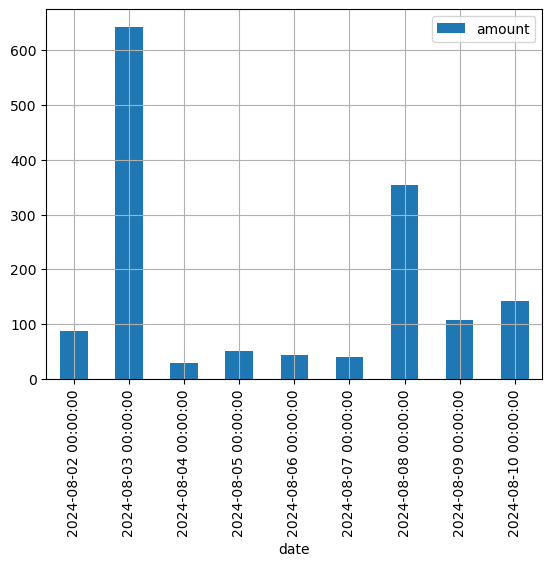

In [7]:
expenses_per_date.plot(kind="bar")
plt.grid()

Conclusion : Clearly it is observed that the maximum expenses occurred on 3rd August and 8th August.

Analysis 2.1 : Expenses per category

In [8]:
df_without_date = df.drop(["date"], axis=1)

expenses_per_category = df_without_date.groupby("category").sum()

expenses_per_category = expenses_per_category[["amount"]]

expenses_per_category

,amount
category,
city_tour,57.00
food,166.03
ice_cream,67.82
misc,140.30
restaurant,74.50
stay,656.90
travel,335.70


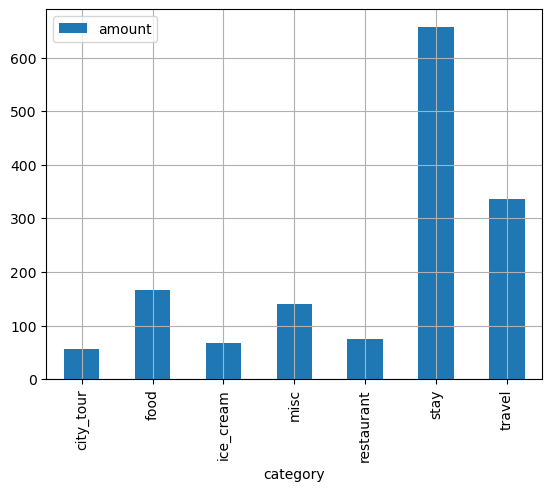

In [9]:
expenses_per_category.plot(kind="bar")
plt.grid()

Conclusion : Clearly it is observed that the maximum expenses occurred for stay and travel.

Analysis 2.2 : Average expense per category

In [10]:
expenses_per_category["count"] = df_without_date['category'].value_counts()

expenses_per_category["average_per_count_per_cat"] = expenses_per_category["amount"] / expenses_per_category["count"]

# expenses_per_category = expenses_per_category[["average_per_category"]]

expenses_per_category

,amount,count,average_per_count_per_cat
category,,,
city_tour,57.00,3,19.000000
food,166.03,23,7.218696
ice_cream,67.82,6,11.303333
misc,140.30,5,28.060000
restaurant,74.50,2,37.250000
stay,656.90,2,328.450000
travel,335.70,5,67.140000


Analysis 2.3 : Expense per person per category

In [11]:
number_of_tourists = 4

expenses_per_category["average_per_person_per_cat"] = expenses_per_category["amount"] / number_of_tourists

# expenses_per_category = expenses_per_category[["average_per_category"]]

expenses_per_category

,amount,count,average_per_count_per_cat,average_per_person_per_cat
category,,,,
city_tour,57.00,3,19.000000,14.2500
food,166.03,23,7.218696,41.5075
ice_cream,67.82,6,11.303333,16.9550
misc,140.30,5,28.060000,35.0750
restaurant,74.50,2,37.250000,18.6250
stay,656.90,2,328.450000,164.2250
travel,335.70,5,67.140000,83.9250


Analysis 2.3 : Expense per person per day per category

In [12]:
number_of_days = 7

expenses_per_category["average_per_person_per_day_per_cat"] = expenses_per_category["amount"] / (number_of_tourists * number_of_days)

# expenses_per_category = expenses_per_category[["average_per_category"]]

expenses_per_category

,amount,count,average_per_count_per_cat,average_per_person_per_cat,average_per_person_per_day_per_cat
category,,,,,
city_tour,57.00,3,19.000000,14.2500,2.035714
food,166.03,23,7.218696,41.5075,5.929643
ice_cream,67.82,6,11.303333,16.9550,2.422143
misc,140.30,5,28.060000,35.0750,5.010714
restaurant,74.50,2,37.250000,18.6250,2.660714
stay,656.90,2,328.450000,164.2250,23.460714
travel,335.70,5,67.140000,83.9250,11.989286


Analysis 3 : expenses per payee

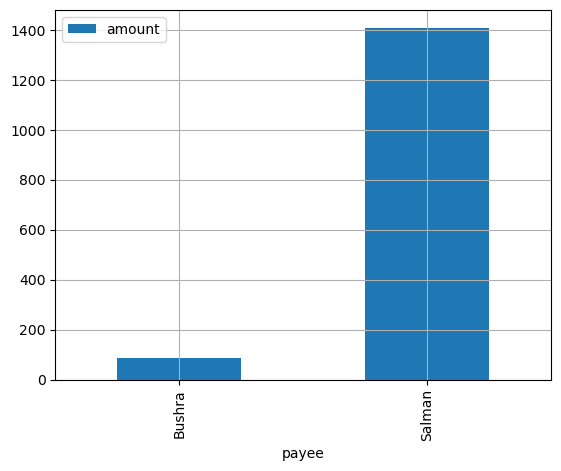

In [13]:
expenses_per_payee = df_without_date.groupby("payee").sum()

expenses_per_payee = expenses_per_payee[["amount"]]

expenses_per_payee.plot(kind="bar")
plt.grid()

In [14]:
expenses_per_payee

,amount
payee,
Bushra,87.78
Salman,1410.47
